In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [4]:
import pandas as pd

# Define the relative file paths
fault_data_path = '../data/raw/fault_data.csv'
scada_data_path = '../data/raw/scada_data.csv'
status_data_path = '../data/raw/status_data.csv'
rpt_2014_path = '../data/raw/rpt_2014.xlsx'
rpt_2015_path = '../data/raw/rpt_2015.xlsx'

# Load the CSV files
fault_df = pd.read_csv(fault_data_path)
scada_df = pd.read_csv(scada_data_path)
status_df = pd.read_csv(status_data_path)

# Load the Excel files
rpt_2014 = pd.read_excel(rpt_2014_path, sheet_name=None)  # Load all sheets

# Display the head of each dataframe to confirm loading
print(fault_df.head())
print(scada_df.head())
print(status_df.head())
print(rpt_2014.keys())  # Display sheet names

              DateTime          Time Fault
0  2014-05-14 14:39:44  1.400096e+09    GF
1  2014-05-14 14:50:24  1.400097e+09    GF
2  2014-05-14 14:58:56  1.400098e+09    GF
3  2014-05-14 15:09:36  1.400098e+09    GF
4  2014-05-14 15:20:16  1.400099e+09    GF
        DateTime        Time  Error  WEC: ava. windspeed  WEC: max. windspeed  \
0  5/1/2014 0:00  1398920448      0                  6.9                  9.4   
1  5/1/2014 0:09  1398920960      0                  5.3                  8.9   
2  5/1/2014 0:20  1398921600      0                  5.0                  9.5   
3  5/1/2014 0:30  1398922240      0                  4.4                  8.3   
4  5/1/2014 0:39  1398922752      0                  5.7                  9.7   

   WEC: min. windspeed  WEC: ava. Rotation  WEC: max. Rotation  \
0                  2.9                 0.0                0.02   
1                  1.6                 0.0                0.01   
2                  1.4                 0.0               

In [5]:
scada_df['DateTime'] = pd.to_datetime(scada_df['DateTime'])
status_df['Time'] = pd.to_datetime(status_df['Time'])
status_df.rename(columns={'Time': 'DateTime'}, inplace=True)
fault_df['DateTime'] = pd.to_datetime(fault_df['DateTime'])

/var/folders/jm/s09h9y6x0gg37tsg51478t080000gn/T/ipykernel_50578/1146596295.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  status_df['Time'] = pd.to_datetime(status_df['Time'])


(0.0, 4.0)

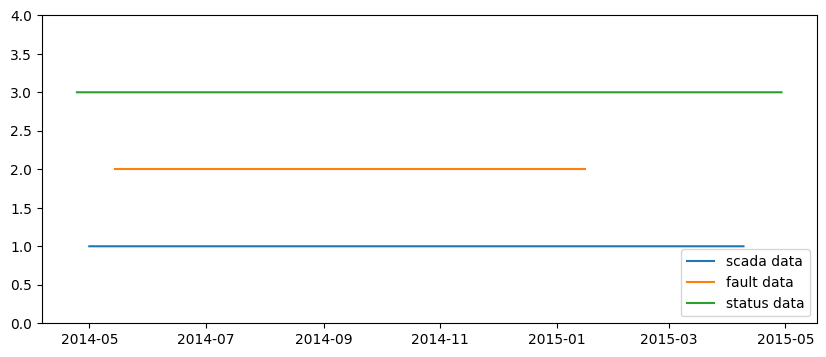

In [6]:
# Plot time span of all data
t_scada = scada_df.DateTime
t_fault = fault_df.DateTime
t_status = status_df.DateTime

plt.figure(figsize=(10,4))
plt.plot(t_scada, np.full(len(scada_df), 1), label='scada data')
plt.plot(t_fault, np.full(len(fault_df), 2), label='fault data')
plt.plot(t_status, np.full(len(status_df), 3), label='status data')
plt.legend(loc='lower right')
plt.ylim(0,4)

<Axes: xlabel='DateTime'>

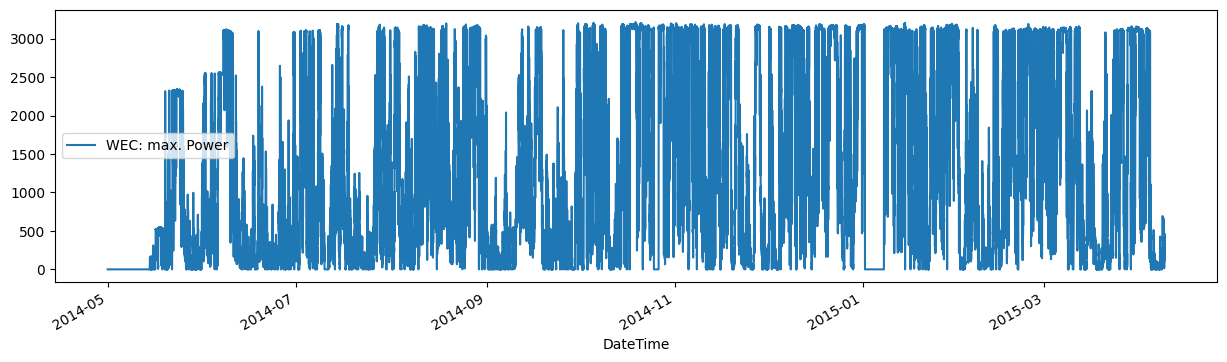

In [7]:
# Plot of max power from SCADA data
scada_df.plot(x='DateTime', y='WEC: max. Power', figsize=(15,4))

<Axes: xlabel='DateTime'>

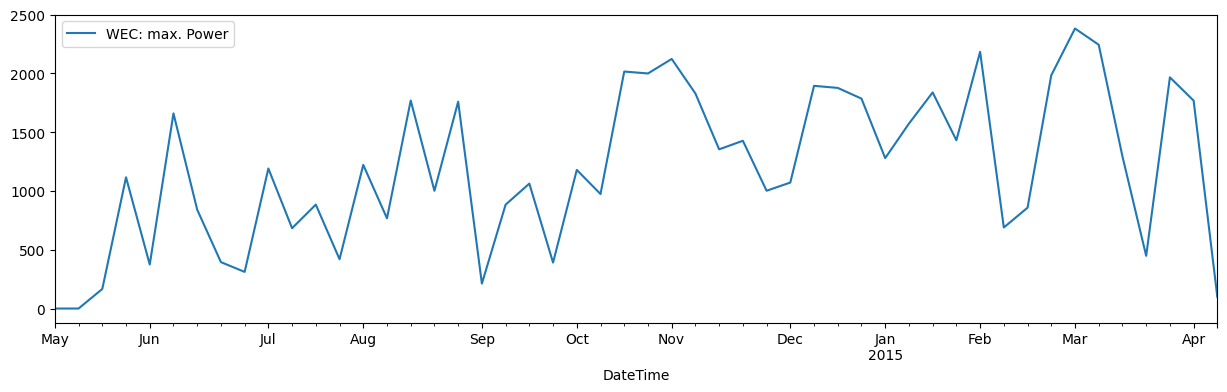

In [8]:
# Plot of max power on weekly resampled data
y = 'WEC: max. Power'
scada_df.resample('W', on='DateTime').mean().plot(y=y, figsize=(15,4))

<Axes: xlabel='DateTime'>

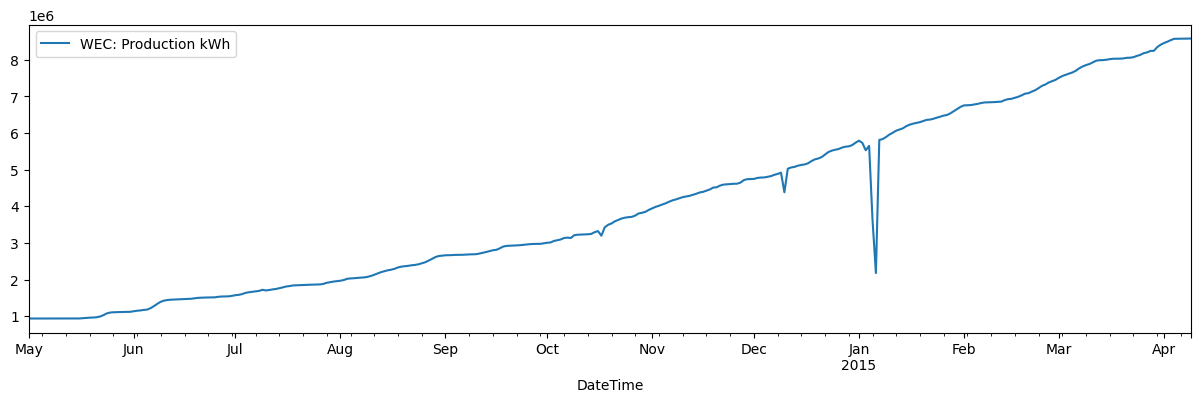

In [9]:
# Plot of power production on monthly resampled data
y = 'WEC: Production kWh'
scada_df.resample('D', on='DateTime').mean().plot(y=y, figsize=(15,4))

/var/folders/jm/s09h9y6x0gg37tsg51478t080000gn/T/ipykernel_50578/1782174713.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fault_df.resample('M', on='DateTime').Fault.count().plot.bar()


<Axes: xlabel='DateTime'>

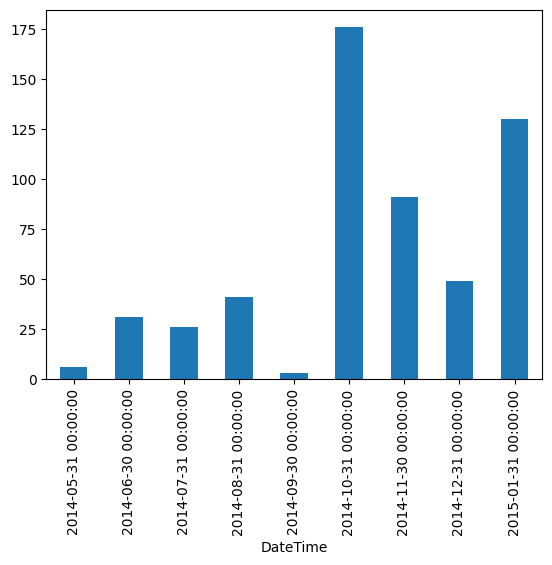

In [10]:
# Plot of number of faults on monthly resampled data
fault_df.resample('M', on='DateTime').Fault.count().plot.bar()

In [11]:
fault_df.resample('M', on='DateTime').Fault.value_counts()


/var/folders/jm/s09h9y6x0gg37tsg51478t080000gn/T/ipykernel_50578/1587240955.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fault_df.resample('M', on='DateTime').Fault.value_counts()


DateTime    Fault
2014-05-31  GF        6
2014-06-30  AF       15
            MF       14
            FF        2
2014-07-31  AF       10
            EF        8
            FF        6
            MF        2
2014-08-31  AF       28
            EF        7
            FF        6
2014-09-30  AF        3
2014-10-31  EF       93
            FF       68
            GF       11
            MF        4
2014-11-30  EF       66
            FF       25
2014-12-31  FF       49
2015-01-31  FF       98
            GF       26
            AF        6
Name: count, dtype: int64

In [12]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month

/var/folders/jm/s09h9y6x0gg37tsg51478t080000gn/T/ipykernel_50578/1399793357.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fault_df.resample('M', on='DateTime').Fault.value_counts().unstack().plot.bar(stacked=True, width=0.8, figsize=(10,5), color=c, rot=45,


<Axes: title={'center': 'Wind Turbine Faults'}, xlabel='DateTime', ylabel='Fault Counts'>

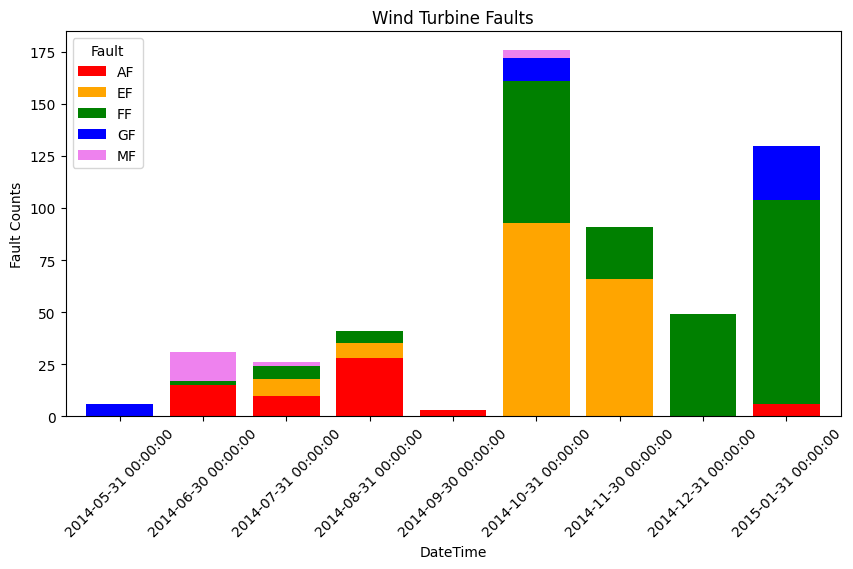

In [13]:
c = ['red', 'orange', 'green', 'blue', 'violet']
fault_df.resample('M', on='DateTime').Fault.value_counts().unstack().plot.bar(stacked=True, width=0.8, figsize=(10,5), color=c, rot=45,
                                                                              title='Wind Turbine Faults', ylabel='Fault Counts')

<Axes: >

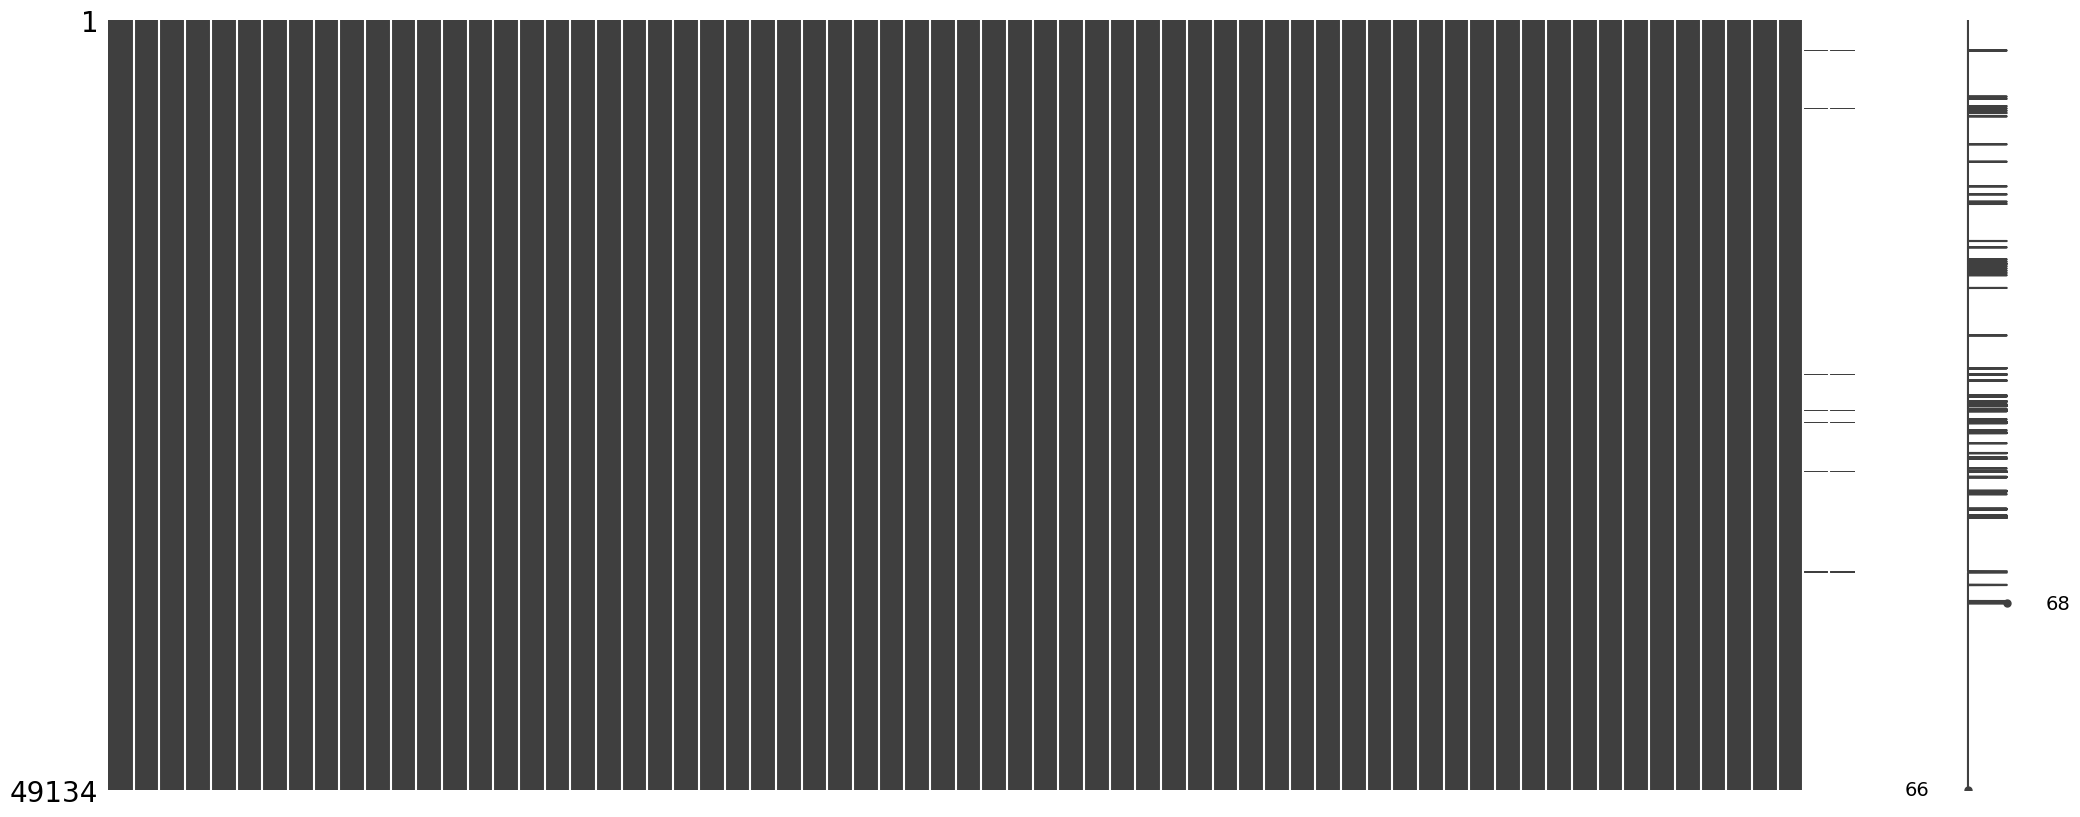

In [18]:
# Combine scada and fault data
df_combine = scada_df.merge(fault_df, on='Time', how='outer')
msno.matrix(df_combine)

In [19]:
# Replace records that has no fault label (NaN) as 'NF' (no fault)
df_combine['Fault'] = df_combine['Fault'].replace(np.nan, 'NF')

df_combine

,DateTime_x,Time,Error,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,...,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,DateTime_y,Fault
0,2014-05-01 00:00:00,1398920448,0,6.9,9.4,2.9,0.00,0.02,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
1,2014-05-01 00:09:00,1398920960,0,5.3,8.9,1.6,0.00,0.01,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
2,2014-05-01 00:20:00,1398921600,0,5.0,9.5,1.4,0.00,0.04,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
3,2014-05-01 00:30:00,1398922240,0,4.4,8.3,1.3,0.00,0.08,0.00,0,...,25,12,14,24,34,2501,25.272728,1.103713,NaT,NF
4,2014-05-01 00:39:00,1398922752,0,5.7,9.7,1.2,0.00,0.05,0.00,0,...,25,12,14,23,34,2501,25.272728,1.103713,NaT,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,1428553216,0,3.9,5.5,2.2,6.75,7.40,6.01,147,...,28,9,17,27,35,3050,24.454546,3.474583,NaT,NF
49130,2015-04-08 23:30:00,1428553856,0,3.9,5.6,2.9,6.64,7.06,6.33,128,...,28,9,17,27,35,3050,24.454546,3.445683,NaT,NF
49131,2015-04-08 23:39:00,1428554368,0,4.2,6.7,2.6,7.18,8.83,6.22,163,...,28,9,18,27,34,3050,24.363636,3.413876,NaT,NF
49132,2015-04-08 23:50:00,1428555008,0,4.1,6.6,2.7,7.02,7.94,6.20,160,...,28,9,17,27,34,3050,24.000000,3.376389,NaT,NF


In [22]:

# Combine all sheets into a single dataframe
rpt_2014_combined = pd.concat(rpt_2014.values(), ignore_index=True)
# Adjust the 'Hour Ending' from '24:00' to '00:00' and correct the date
rpt_2014_combined['Hour Ending'] = rpt_2014_combined['Hour Ending'].replace('24:00', '00:00')
rpt_2014_combined['Delivery Date'] = pd.to_datetime(rpt_2014_combined['Delivery Date'])
rpt_2014_combined.loc[rpt_2014_combined['Hour Ending'] == '00:00', 'Delivery Date'] += pd.Timedelta(days=1)

# Now convert 'Delivery Date' and 'Hour Ending' to a single 'DateTime' column again
rpt_2014_combined['DateTime'] = pd.to_datetime(rpt_2014_combined['Delivery Date'].astype(str) + ' ' + rpt_2014_combined['Hour Ending'])

# Display the head of the corrected rpt_2014 dataframe
print(rpt_2014_combined.tail())

       Delivery Date Hour Ending Repeated Hour Flag Settlement Point  \
122635    2015-01-01       00:00                  N          LZ_LCRA   
122636    2015-01-01       00:00                  N         LZ_NORTH   
122637    2015-01-01       00:00                  N         LZ_RAYBN   
122638    2015-01-01       00:00                  N         LZ_SOUTH   
122639    2015-01-01       00:00                  N          LZ_WEST   

        Settlement Point Price   DateTime  
122635                   26.96 2015-01-01  
122636                   26.94 2015-01-01  
122637                   26.94 2015-01-01  
122638                   27.74 2015-01-01  
122639                   27.80 2015-01-01  


In [24]:
# Save the final merged dataframe to a CSV file in the data/raw folder
output_path = '../data/raw/final_merged_data.csv'
df_combine.to_csv(output_path, index=False)

print('Merged file saved to ' + output_path)

Merged file saved to ../data/raw/final_merged_data.csv


In [25]:
# Save the final merged dataframe to a CSV file in the data/raw folder
output_path = '../data/raw/rpt_2014_combined.csv'
rpt_2014_combined.to_csv(output_path, index=False)

print('Merged file saved to ' + output_path)

Merged file saved to ../data/raw/rpt_2014_combined.csv
